### 2.4

假设$Y$与$X_1,X_2$之间满足线性回归关系
$$
y_1=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon_i,i=1,2,3,\dots,15
$$
其中$\epsilon_i \sim N(0,\sigma^2)$且独立同分布

#### (6)求$Y$的拟合值，残差及学生化残差。根据对学生化残差正态性的频率检验及正态QQ图检验说明模型误差项的正态性假定是否合理，有序学生化残差与相应标准正态分布的分位数的相关系数是多少？作出各种残差图，分析模型有关假定的合理性。

Y拟合值： [161.89572437 122.66731763 224.42938429 131.24062439  67.69928353
 169.6848553   79.7319357  189.67200303 119.83201895  53.29052354
 253.7150576  228.6907949  144.97934226 100.53307489 210.93805961]
残差： [ 0.10427563 -2.66731763 -1.42938429 -0.24062439 -0.69928353 -0.6848553
  1.2680643   2.32799697 -3.83201895  1.70947646 -1.7150576   3.3092051
 -0.97934226  2.46692511  1.06194039]
学生化残差： [ 0.05194039 -1.31980863 -0.72772899 -0.11483379 -0.35782486 -0.34673628
  0.66640659  1.22832958 -1.92482483  0.91733453 -0.92965581  1.89099721
 -0.46960171  1.24299305  0.57619385]
学生化残差与标准正态分布分位数的相关系数：0.9934


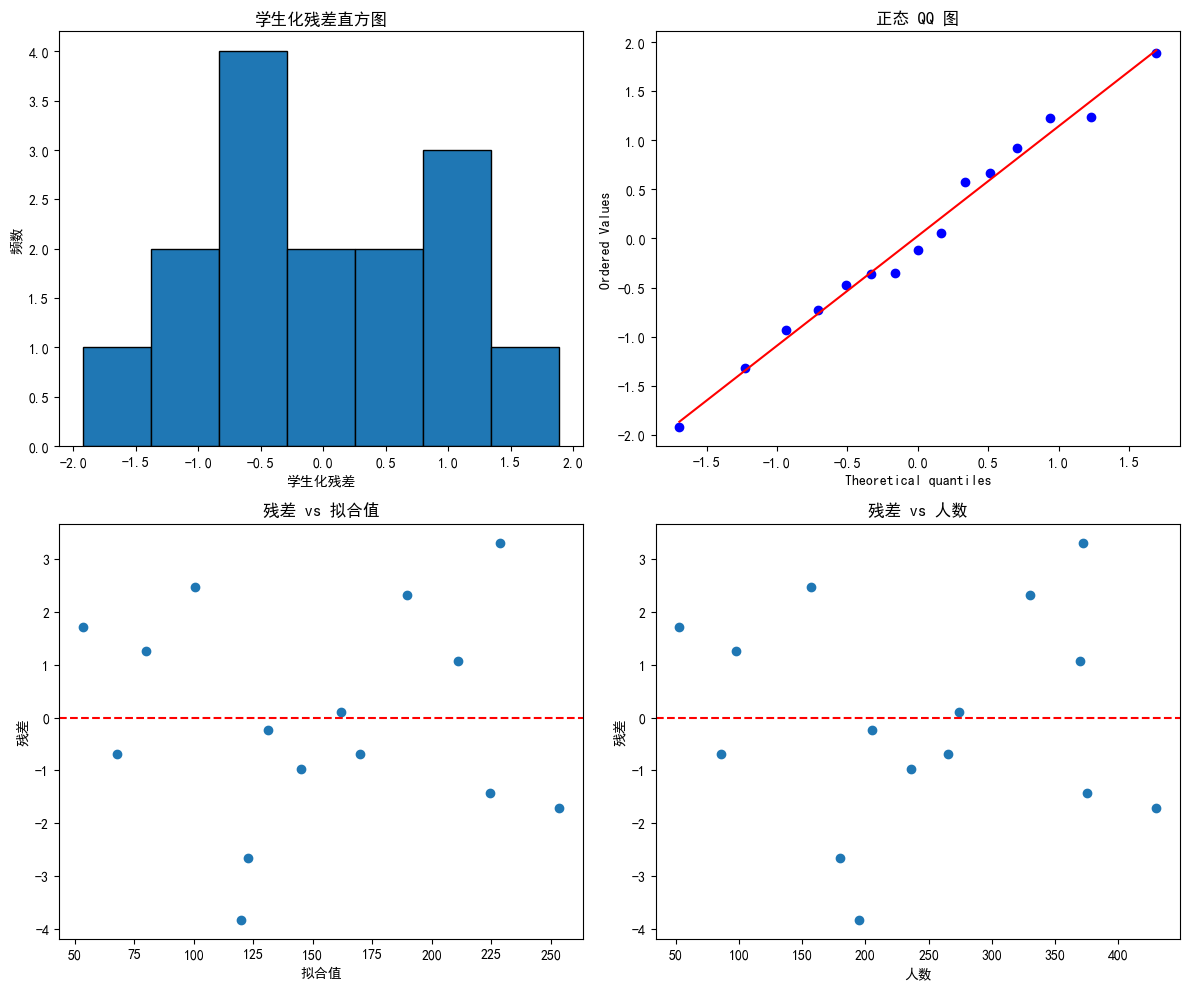

各区间实际频数： [0 2 6 4 3 0]
各区间理论频数（标准正态）： [0 2 5 5 2 0]

卡方统计量: 1.5329
自由度: 6
p 值: 0.9573
⇒ 接受 H0：残差服从正态分布


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data = pd.DataFrame({
    '销量': [162, 120, 223, 131, 67, 169, 81, 192, 116, 55, 252, 232, 144, 103, 212],
    '人数': [274, 180, 375, 205, 86, 265, 98, 330, 195, 53, 430, 372, 236, 157, 370],
    '收入': [2450, 3254, 3802, 2838, 2347, 3782, 3008, 2450, 2137, 2560, 4020, 4427, 2660, 2088, 2605]}
)
X = data[['人数', '收入']].values
# X加上一个全是1的列
X_wide = np.hstack((np.ones((X.shape[0], 1)), X))
Y = data['销量'].values
H = X_wide @ np.linalg.inv(X_wide.T @ X_wide) @ X_wide.T
beta_hat = np.linalg.inv(X_wide.T @ X_wide) @ X_wide.T @ Y
I = np.eye(H.shape[0])
sigma_2_hat = Y.T @ (I - H) @ Y / (X_wide.shape[0] - X_wide.shape[1])
# 拟合值
Y_hat = X_wide @ beta_hat
print('Y拟合值：',Y_hat)
# 残差
residuals = Y - Y_hat
print('残差：',residuals)
# 帽子矩阵 H 的对角线元素（leverages）
H_diag = np.sum(X_wide * (X_wide @ np.linalg.inv(X_wide.T @ X_wide)), axis=1)

# 学生化残差
studentized_residuals = residuals / np.sqrt(sigma_2_hat * (1 - H_diag))
print('学生化残差：',studentized_residuals)
# 排序后的学生化残差
r_sorted = np.sort(studentized_residuals)

# 标准正态分布的理论分位数
n = len(Y)
q_theoretical = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)

# 相关系数
corr_coef = np.corrcoef(r_sorted, q_theoretical)[0, 1]
print(f"学生化残差与标准正态分布分位数的相关系数：{corr_coef:.4f}")

# 频率直方图 & QQ 图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 残差直方图
axs[0, 0].hist(studentized_residuals, bins=7, edgecolor='black')
axs[0, 0].set_title("学生化残差直方图")
axs[0, 0].set_xlabel("学生化残差")
axs[0, 0].set_ylabel("频数")

# QQ图
stats.probplot(studentized_residuals, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("正态 QQ 图")

# 残差 vs 拟合值
axs[1, 0].scatter(Y_hat, residuals)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_title("残差 vs 拟合值")
axs[1, 0].set_xlabel("拟合值")
axs[1, 0].set_ylabel("残差")

# 残差 vs 人数（X1）
axs[1, 1].scatter(X[:, 0], residuals)
axs[1, 1].axhline(0, color='red', linestyle='--')
axs[1, 1].set_title("残差 vs 人数")
axs[1, 1].set_xlabel("人数")
axs[1, 1].set_ylabel("残差")

plt.tight_layout()
plt.show()

bins = [-np.inf, -2, -1, 0, 1, 2, np.inf]
labels = ['(-∞,-2)', '[-2,-1)', '[-1,0)', '[0,1)', '[1,2)', '[2,∞)']

# 实际频数
group_counts = pd.cut(studentized_residuals, bins=bins, labels=labels).value_counts().sort_index()
observed_freq = group_counts.values
print("各区间实际频数：", observed_freq)

# 理论频率（标准正态下的概率 * 样本数）
theoretical_probs = np.array([
    stats.norm.cdf(-2),
    stats.norm.cdf(-1) - stats.norm.cdf(-2),
    stats.norm.cdf(0) - stats.norm.cdf(-1),
    stats.norm.cdf(1) - stats.norm.cdf(0),
    stats.norm.cdf(2) - stats.norm.cdf(1),
    1 - stats.norm.cdf(2)
])
expected_freq = theoretical_probs * n
print("各区间理论频数（标准正态）：", expected_freq.astype(int))

# 卡方拟合优度检验
chi2_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
df_chi2 = len(bins) - 1 - 0  # 分组数 - 1，自由度
p_chi2 = 1 - stats.chi2.cdf(chi2_stat, df_chi2)

print(f"\n卡方统计量: {chi2_stat:.4f}")
print(f"自由度: {df_chi2}")
print(f"p 值: {p_chi2:.4f}")

if p_chi2 > 0.05:
    print("⇒ 接受 H0：残差服从正态分布")
else:
    print("⇒ 拒绝 H0：残差不服从正态分布")

学生化残差正态性的频率检验及正态QQ图检验说明模型误差项的正态性假定合理.有序学生化残差与相应标准正态分布的分位数的相关系数是0.9934。

### 2.5

模型$Y=f(X)+\epsilon$的20组数据

In [36]:
import pandas as pd

data = pd.DataFrame({
    'x': [
        0.05, 0.15, 0.25, 0.35, 0.45,
        0.55, 0.65, 0.75, 0.85, 0.95,
        1.05, 1.15, 1.25, 1.35, 1.45,
        1.55, 1.65, 1.75, 1.85, 1.95
    ],
    'y': [
        5.9421, 5.4691, 5.8724, 5.1815, 5.1955,
        5.2487, 5.1356, 5.2260, 5.0813, 5.2236,
        4.7349, 4.5949, 5.1543, 5.2844, 5.3448,
        5.1462, 5.4091, 5.6500, 6.0256, 5.5350
    ]
})



#### (1)首先拟合$Y$关于$X$的线性回归模型，结果如何？通过残差分析（尤其是残差图分析）并参考$Y$与$X$的散点图，选择你认为合理的回归函数形式。拟合你所选择的回归模型，再通过残差分析考察所设定的模型的合理性。最后，将你所拟合的回归方程与真实模型($Y=5+(X-1)^2+ \epsilon,\epsilon \sim N(0,0.625)$)比较，你是否给出了正确的模型形式？

先拟合$Y=\beta_0 + \beta_1 X + \epsilon$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                 0.0004554
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.983
Time:                        20:33:43   Log-Likelihood:                -7.3890
No. Observations:                  20   AIC:                             18.78
Df Residuals:                      18   BIC:                             20.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3197      0.165     32.201      0.0

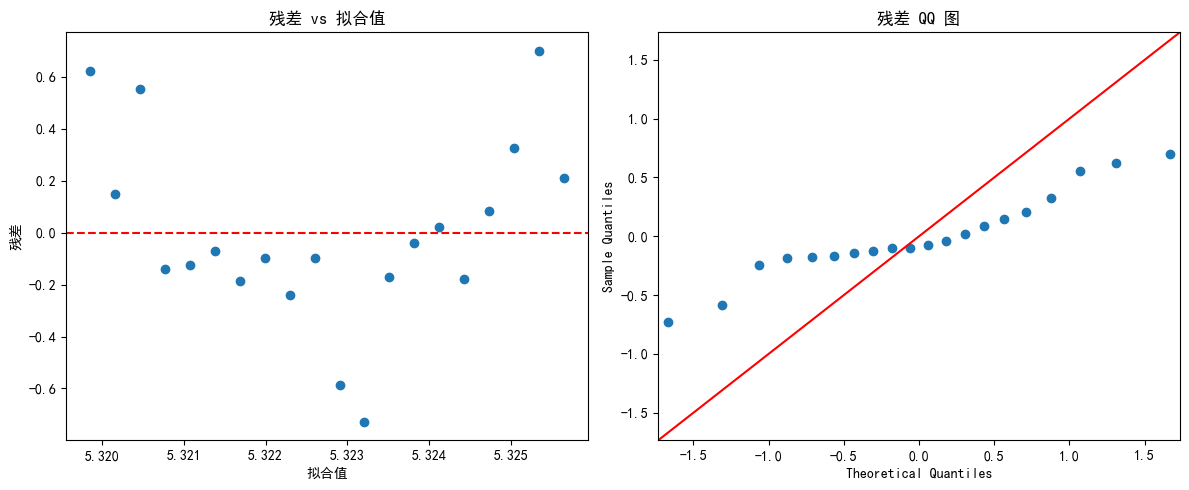

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
# 1.拟合线性模型
X = sm.add_constant(data['x'])
Y = data['y']
model_linear = sm.OLS(Y, X).fit()
print(model_linear.summary())

# 2.残差分析
# 拟合值与残差
y_pred = model_linear.fittedvalues
residuals = model_linear.resid

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 残差 vs 拟合值
axs[0].scatter(y_pred, residuals)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("残差 vs 拟合值")
axs[0].set_xlabel("拟合值")
axs[0].set_ylabel("残差")

# 正态 QQ 图
sm.qqplot(residuals, line='45', ax=axs[1])
axs[1].set_title("残差 QQ 图")

plt.tight_layout()
plt.show()


拟合结果不是很好，残差应该有二次的信息没有提取。拟合拟合$Y=\beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     15.33
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           0.000157
Time:                        20:33:43   Log-Likelihood:                 2.9194
No. Observations:                  20   AIC:                            0.1612
Df Residuals:                      17   BIC:                             3.148
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9524      0.153     38.942      0.0

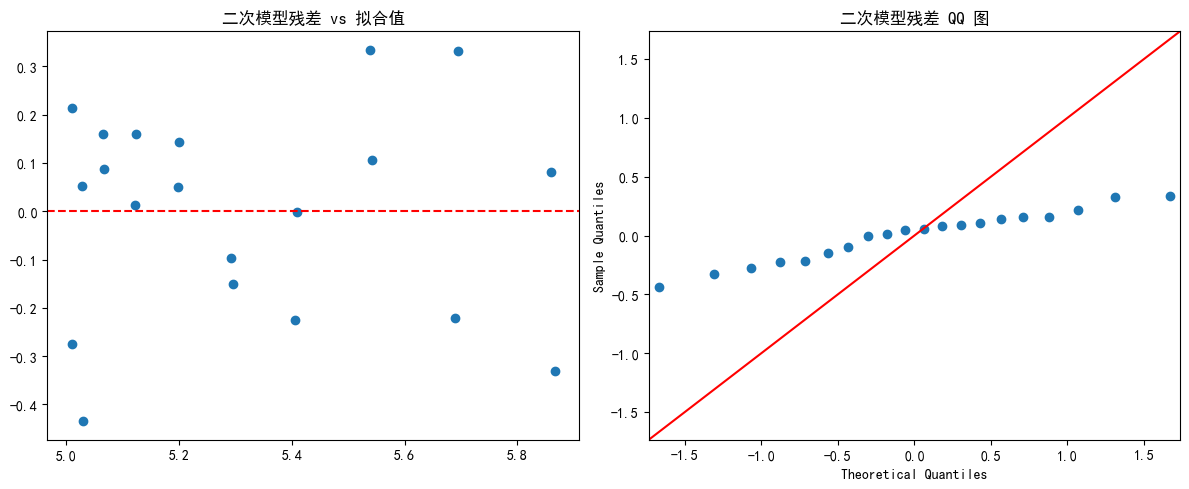

In [38]:
# 添加二次项
data['x2'] = data['x'] ** 2
X_poly = sm.add_constant(data[['x', 'x2']])
model_quad = sm.OLS(data['y'], X_poly).fit()
print(model_quad.summary())
# 残差
y_pred_quad = model_quad.fittedvalues
resid_quad = model_quad.resid

# 残差图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(y_pred_quad, resid_quad)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("二次模型残差 vs 拟合值")

sm.qqplot(resid_quad, line='45', ax=axs[1])
axs[1].set_title("二次模型残差 QQ 图")

plt.tight_layout()
plt.show()

残差与拟合值的散点图显示，残差无系统性偏离，未呈现明显的非线性或异方差结构，说明模型的线性性与方差齐性假设基本成立。

与真实模型：$Y = 6 - 2X + X^2 + \varepsilon, \varepsilon \sim N(0, 0.625)$

形式一致，表明我们恢复了真实模型。综上，二次回归模型是合理的建模形式。

#### (2)如果对因变量作Box-Cox变换，求变换参数$\lambda$的值。拟合变换后的变量关于$x$的简单线性回归模型；结果如何？你对Box-Cox变换有何新的认识？

Box-Cox 变换是一种常用于让响应变量$Y$更接近正态分布、稳定方差的变换方式：
$$
Y^{(\lambda)} =
\begin{cases}
\dfrac{Y^\lambda - 1}{\lambda}, & \lambda \ne 0 \\
\ln Y, & \lambda = 0
\end{cases}
$$
通过极大似然估计，求得最优变换参数.对变换后的 $Y^{(\lambda)}$ 关于 $x$ 拟合线性模型：$Y^{(\lambda)} = \beta_0 + \beta_1 x + \varepsilon$

Box-Cox 最优 λ 值为：0.0026
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                 0.0003608
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.985
Time:                        20:33:43   Log-Likelihood:                 25.987
No. Observations:                  20   AIC:                            -47.97
Df Residuals:                      18   BIC:                            -45.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6729      0.

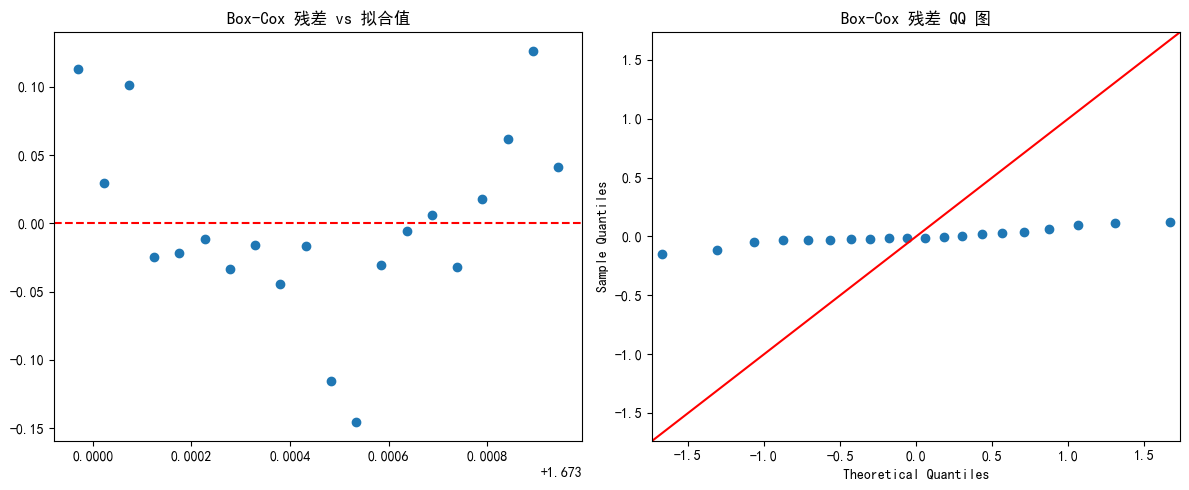

In [39]:
from scipy.stats import boxcox
import statsmodels.api as sm

# 确保 y > 0
y_orig = data['y'].values
x = data['x'].values

# Box-Cox 变换 + 最优 λ
y_boxcox, fitted_lambda = boxcox(y_orig)
print(f"Box-Cox 最优 λ 值为：{fitted_lambda:.4f}")

# 拟合 Box-Cox 变换后的 Y 对 X 的线性模型
X_bc = sm.add_constant(x)
model_bc = sm.OLS(y_boxcox, X_bc).fit()
print(model_bc.summary())
# 拟合值与残差
y_pred_bc = model_bc.fittedvalues
resid_bc = model_bc.resid

# 残差图 & QQ 图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(y_pred_bc, resid_bc)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("Box-Cox 残差 vs 拟合值")

sm.qqplot(resid_bc, line='45', ax=axs[1])
axs[1].set_title("Box-Cox 残差 QQ 图")

plt.tight_layout()
plt.show()


最优参数估计为 $\hat{\lambda} = 0.0026$，接近于 0，相当于对 $Y$ 进行了对数变换。随后对变换后的变量拟合线性模型.

模型的 $R^2$ 几乎为 0，F 统计量对应的 $p$ 值高达 0.985，说明变量 $X$ 对响应变量几乎没有解释力，残差图也呈现出明显的偏离趋势。

虽然 Box-Cox 变换在某些情况下能够改善非正态性和异方差问题，但它并不能解决模型函数形式选择错误的问题。在本例中，正确的模型应为：$Y = 5 + (X - 1)^2 + \varepsilon$

这是一个非线性的结构，Box-Cox 变换无法将其线性化。因此，我们对 Box-Cox 变换有了更深的认识：它是针对响应变量的分布改善工具，而非万能的模型结构调整方法。在面对结构性非线性时，仍应优先考虑模型形式的正确设定。

### 2.6
在林业工程中，研究树干的体积与离地面一定高度的树干直径$X_1$和树干高度$X_2$之间的关系具有重要的实用意义。

In [40]:
data = pd.DataFrame({
    'x1': [
        8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11.0, 11.0, 11.1, 11.2,
        11.3, 11.4, 11.4, 11.7, 12.0, 12.9, 13.3, 13.7, 13.8, 14.0,
        14.2, 14.5, 16.0, 16.3, 17.3, 17.5, 17.9, 18.0, 18.0, 20.6
    ],
    'x2': [
        70, 65, 63, 72, 81, 83, 66, 75, 80, 75,
        79, 76, 76, 69, 75, 74, 86, 71, 64, 78,
        80, 74, 72, 77, 81, 82, 80, 80, 80, 87
    ],
    'y': [
        10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9,
        24.2, 21.0, 21.4, 21.3, 22.2, 33.8, 27.4, 25.7, 24.9, 34.5,
        31.7, 36.3, 38.3, 42.6, 55.4, 55.7, 58.3, 51.5, 51.0, 77.0
    ]
})


#### (1)首先拟合线性回归模型$Y=\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon$通过残差分析考察模型的合理性，是否需要对数据做变换？

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     260.6
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.23e-18
Time:                        20:34:53   Log-Likelihood:                -81.160
No. Observations:                  30   AIC:                             168.3
Df Residuals:                      27   BIC:                             172.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.5674      8.845     -6.169      0.0

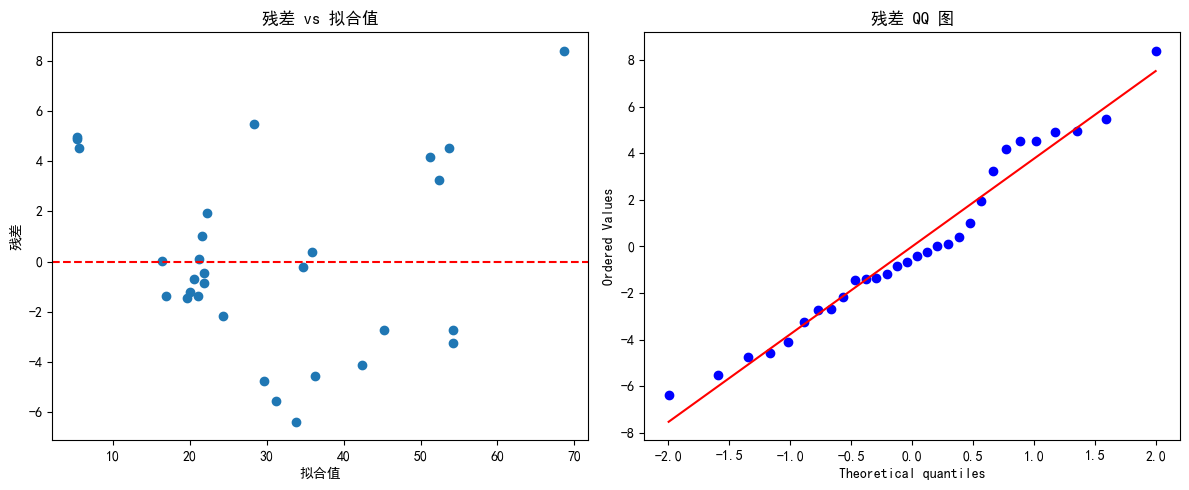

In [43]:
from scipy.stats import probplot
X = sm.add_constant(data[['x1', 'x2']])
y = data['y']
model = sm.OLS(y, X).fit()

print(model.summary())

# 拟合值与残差
fitted = model.fittedvalues
residuals = model.resid

# 绘图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 残差 vs 拟合值
axs[0].scatter(fitted, residuals)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("残差 vs 拟合值")
axs[0].set_xlabel("拟合值")
axs[0].set_ylabel("残差")

# QQ 图
probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title("残差 QQ 图")

plt.tight_layout()
plt.show()


残差在低值时较集中，但在高值处呈发散趋势，存在异方差问题；当前模型的假设不完全成立，对 $Y$ 进行 Box-Cox 变换

#### (2)对因变量$Y$作 Box-Cox 变换，确定变换参数$\lambda$的值。对变换后的因变量重新拟合与$X_1,X_2$的线性回归模型并作残差分析，Box-Cox变换的效果如何？

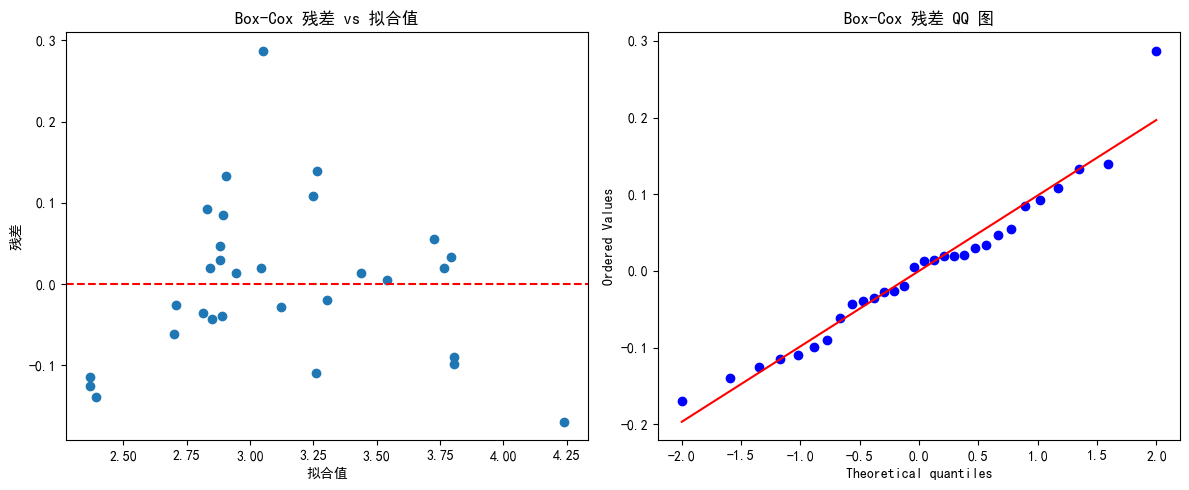

-0.03020043535260387

In [44]:
# Box-Cox变换（y > 0）
y_orig = data['y'].values
y_boxcox, lambda_bc = boxcox(y_orig)

# 拟合Box-Cox变换后的线性回归模型
X = sm.add_constant(data[['x1', 'x2']])
model_bc = sm.OLS(y_boxcox, X).fit()
resid_bc = model_bc.resid
fitted_bc = model_bc.fittedvalues

# 画残差图和QQ图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(fitted_bc, resid_bc)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("Box-Cox 残差 vs 拟合值")
axs[0].set_xlabel("拟合值")
axs[0].set_ylabel("残差")

probplot(resid_bc, dist="norm", plot=axs[1])
axs[1].set_title("Box-Cox 残差 QQ 图")

plt.tight_layout()
plt.show()

# 输出模型摘要和lambda
model_summary = model_bc.summary().as_text()
lambda_bc

对$Y$应用Box-Cox变换，估计出的最优参数为 $\hat{\lambda} = -0.0302$，接近于 0，意味着对 $Y$ 取对数变换是较优选择。变换后重新拟合模型：
$$
Y^{(\lambda)} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

并对残差进行了分析，残差与拟合值之间未表现出明显的非线性趋势或异方差，表明变换后模型满足方差齐性假设；QQ 图中残差基本落在标准正态分布线附近，说明误差项近似服从正态分布。


### 2.7 
在上题中，由于树干可近似地看作圆柱或者圆台，于是考虑回归模型$Y= \beta_0 + \beta_1 X_1^2 + \beta_2 X_2 + \varepsilon$可能更为合理，进行上题同样的分析，并比较

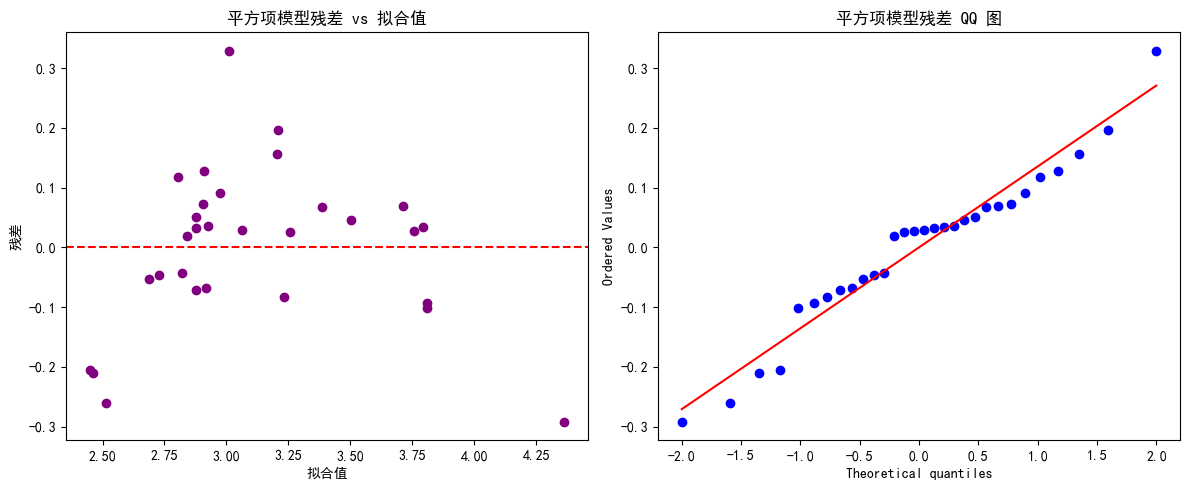

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           9.03e-16
Time:                        21:49:23   Log-Likelihood:                 18.355
No. Observations:                  30   AIC:                            -30.71
Df Residuals:                      27   BIC:                            -26.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1778      0.340      3.462      0.002       0.480       1.876
x1_squared     0.0045      0.000     13.355      0.000       0.004       0.005
x2             0.0146      0.005      3.004      0.006       0.005       0.025
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.348
Skew:                          -0.165   Prob(JB):                        0.840
Kurtosis:                       3.412   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# 构造新的变量 X1^2
data['x1_squared'] = data['x1'] ** 2

# 构造新的回归模型 Y = β₀ + β₁ * x1² + β₂ * x2 + ε
X_quad = sm.add_constant(data[['x1_squared', 'x2']])
model_quad = sm.OLS(y_boxcox, X_quad).fit()

# 提取残差和拟合值
resid_quad = model_quad.resid
fitted_quad = model_quad.fittedvalues

# 画残差图和QQ图
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(fitted_quad, resid_quad, color='purple')
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("平方项模型残差 vs 拟合值")
axs[0].set_xlabel("拟合值")
axs[0].set_ylabel("残差")

probplot(resid_quad, dist="norm", plot=axs[1])
axs[1].set_title("平方项模型残差 QQ 图")

plt.tight_layout()
plt.show()

# 输出回归摘要
model_quad.summary()

$$
Y^{(\lambda)} = \beta_0 + \beta_1 X_1^2 + \beta_2 X_2 + \varepsilon
$$
模型拟合度极高，决定系数 $R^2 = 0.923$；所有系数在显著性水平下均显著；残差图随机分布，未见异方差或非线性趋势；图中残差几乎完全服从正态分布；

因此，引入 $X_1^2$ 后的模型更加合理，且结合 Box-Cox 变换后，显著提升了拟合精度与模型统计性质，具备较强的解释力和预测能力。
